In [1]:
export_path = "/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA/minPct0.01_logfc0.1/GSEA_pctthresh.0.1_pthresh.0.1_pref.FALSE_stat.log2FoldChange_padj.BH/"
#gsea_dir = "/mnt/md0/isshamie/Projects/Mito_Trace/software/Bioinformatics_Tools/"


In [2]:
import os
from os.path import basename, dirname, join, exists
import pandas as pd
from glob import glob
from collections import defaultdict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
outdir = join(export_path, "summary")
if not exists(outdir):
    os.mkdir(outdir)

In [4]:
gsea_outs = glob(export_path+"/*xlsx")
names = [basename(f.split("gsea.xlsx")[0].strip("_").replace(".tsv", "")) for f in gsea_outs ]
names

['1_16_DE',
 '0_11_DE',
 '0_3_DE',
 '1_3_DE',
 '0_13_DE',
 '0_1_DE',
 '0_23_DE',
 '1_19_DE',
 '1_18_DE',
 '1_14_DE',
 '1_5_DE',
 '1_29_DE',
 '1_4_DE',
 '0_29_DE',
 '1_22_DE',
 '0_2_DE',
 '0_20_DE',
 '0_12_DE',
 '1_0_DE',
 '1_27_DE',
 '1_13_DE',
 '0_15_DE',
 '0_0_DE',
 '1_11_DE',
 '1_9_DE',
 '1_2_DE',
 '0_5_DE',
 '1_8_DE',
 '0_9_DE',
 '1_1_DE',
 '0_7_DE',
 '1_7_DE',
 '0_4_DE',
 '0_10_DE',
 '1_6_DE',
 '1_26_DE',
 '1_35_DE',
 '1_25_DE',
 '1_10_DE',
 '1_15_DE',
 '0_6_DE',
 '1_20_DE',
 '0_32_DE']

In [5]:
def hasOverlapInds(gene_set_ids):
    gene_sets = []
    if len(gene_set_ids)<=1:
        return False
    for g in gene_set_ids:
       # print(gene_set_ids[g])
        gene_sets.append(set(gene_set_ids[g]))

    intersection = set.intersection(*gene_sets)
    if len(intersection)>0:
        print('gene_sets')
        print(gene_sets)
        print("intersection")
        print(intersection)
    return len(intersection)>0

In [6]:
out_ds = defaultdict(list)
#out_d = []
all_gene_set_ids = defaultdict(set)
for ind, f in enumerate(gsea_outs):
    print('f', f)
    data = pd.read_excel(f, sheet_name=None)
    name = names[ind]
    curr_comp = []
    gene_set_ids = defaultdict(list)
    for grp in data:
        curr_grp = data[grp].copy().set_index("ID")
        
        curr_grp = curr_grp[[ "p.adjust"]]#, "NES", "setSize"]]
        curr_grp = curr_grp.rename({"p.adjust":f"{name} padjust"} #"NES":f"{name} NES", "setSize":f"{name} setSize", 
                                    ,axis=1)
        curr_comp.append(curr_grp)
        gene_set_ids[grp].extend(curr_grp.index.values)
        all_gene_set_ids[grp] = all_gene_set_ids[grp].union(set(curr_grp.index.values))
        
        out_ds[grp].append(curr_grp)
    assert(not hasOverlapInds(gene_set_ids))
    # concat row-wise since IDs are not the same
    #out_d.append(pd.concat(curr_comp, ignore_index=False))
    
#out_df = pd.concat(out_d, axis=1)

#curr_grp["Db"] = grp

out_dfs = {x:pd.concat(out_ds[x], axis=1, ignore_index=False) for x in out_ds}

for grp in out_dfs:
    grp_df = out_dfs[grp]
    p_cols = grp_df.columns[grp_df.columns.str.contains("padjust")]
    p_cols
    ordered_inds = np.log10(grp_df.loc[:,p_cols].fillna(1.0)).mean(axis=1, skipna=True).sort_values().index
    grp_df = grp_df.loc[ordered_inds]
    out_dfs[grp] = grp_df

f /data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA/minPct0.01_logfc0.1/GSEA_pctthresh.0.1_pthresh.0.1_pref.FALSE_stat.log2FoldChange_padj.BH/1_16_DE.tsv_gsea.xlsx
f /data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA/minPct0.01_logfc0.1/GSEA_pctthresh.0.1_pthresh.0.1_pref.FALSE_stat.log2FoldChange_padj.BH/0_11_DE.tsv_gsea.xlsx
f /data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg3

f /data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA/minPct0.01_logfc0.1/GSEA_pctthresh.0.1_pthresh.0.1_pref.FALSE_stat.log2FoldChange_padj.BH/1_2_DE.tsv_gsea.xlsx
f /data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_clone_btwncond_RNA/minPct0.01_logfc0.1/GSEA_pctthresh.0.1_pthresh.0.1_pref.FALSE_stat.log2FoldChange_padj.BH/0_5_DE.tsv_gsea.xlsx
f /data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_

## Save csv and figure

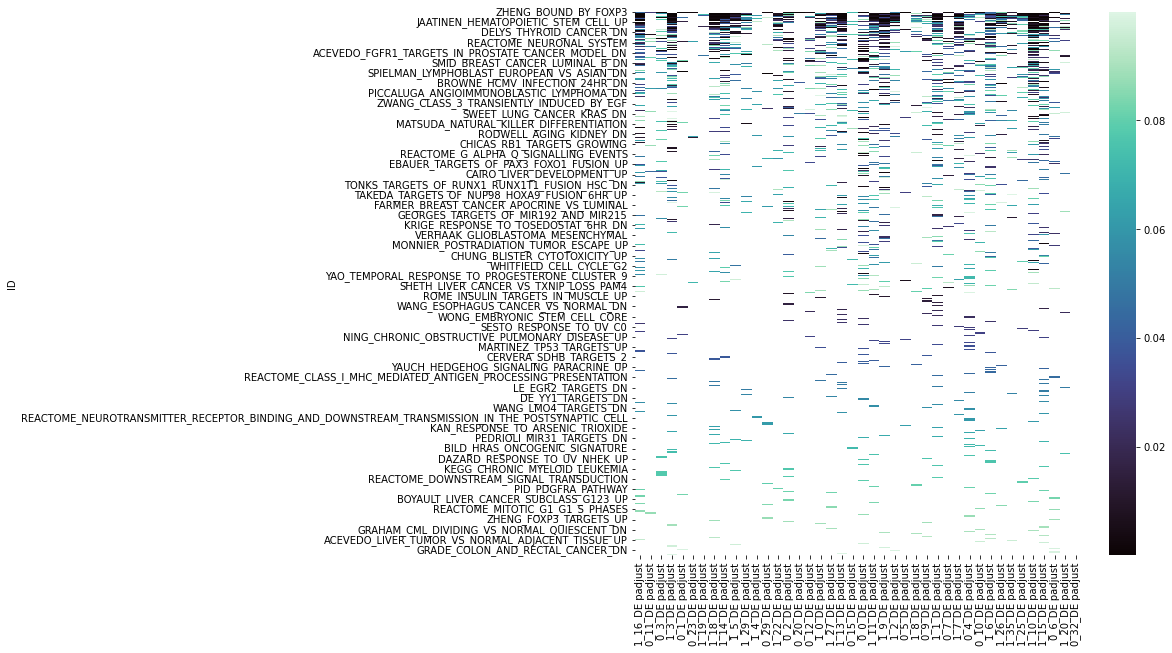

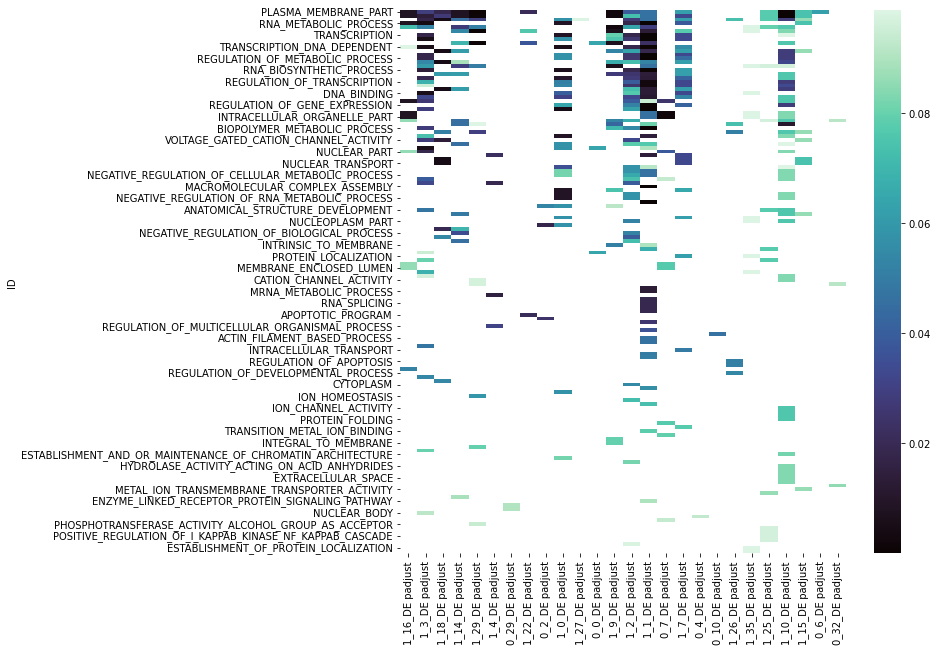

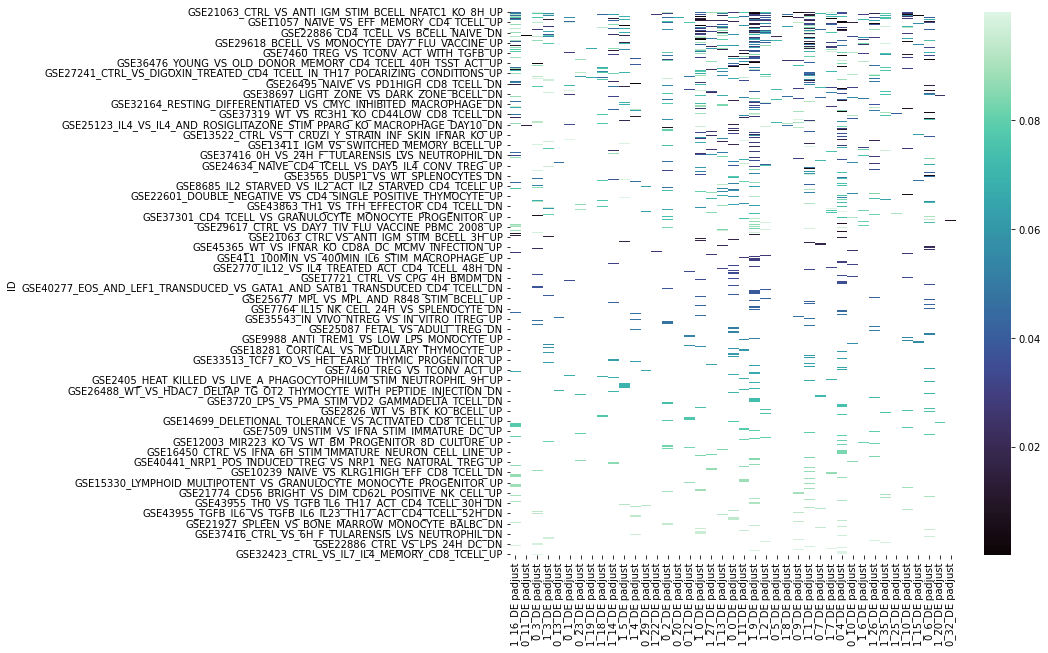

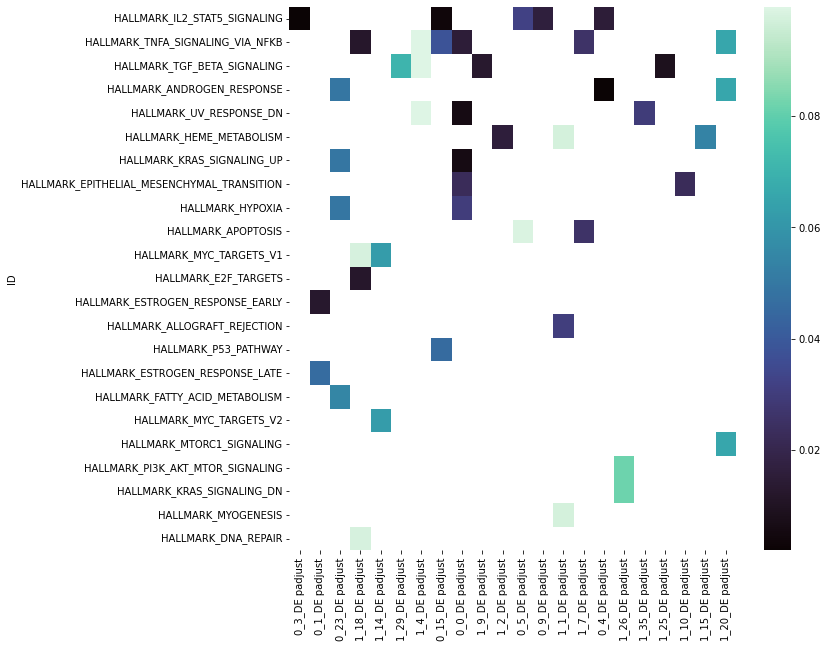

In [7]:

%matplotlib inline

for grp in out_dfs:
    curr_out_f = join(outdir, f"{grp}_summary")
    out_dfs[grp].to_csv(f"{curr_out_f}.csv")
    f = plt.figure(figsize=(10,10))
    sns.heatmap(out_dfs[grp], cmap="mako")
    plt.savefig(f"{curr_out_f}.pdf")


### 